Scraping AQ-10 questions from the website...
Using standard AQ-10 questions

AQ-10 Questions:
1. I often notice small sounds when others do not
2. I usually concentrate more on the whole picture, rather than the small details
3. I find it easy to do more than one thing at once
4. If there is an interruption, I can switch back to what I was doing very quickly
5. I find it easy to 'read between the lines' when someone is talking to me
6. I know how to tell if someone listening to me is getting bored
7. When I'm reading a story, I find it difficult to work out the characters' intentions
8. I like to collect information about categories of things
9. I find it easy to work out what someone is thinking or feeling just by looking at their face
10. I find it difficult to work out people's intentions

Loading autism dataset...
Original dataset shape: (292, 21)

First few rows:
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0   

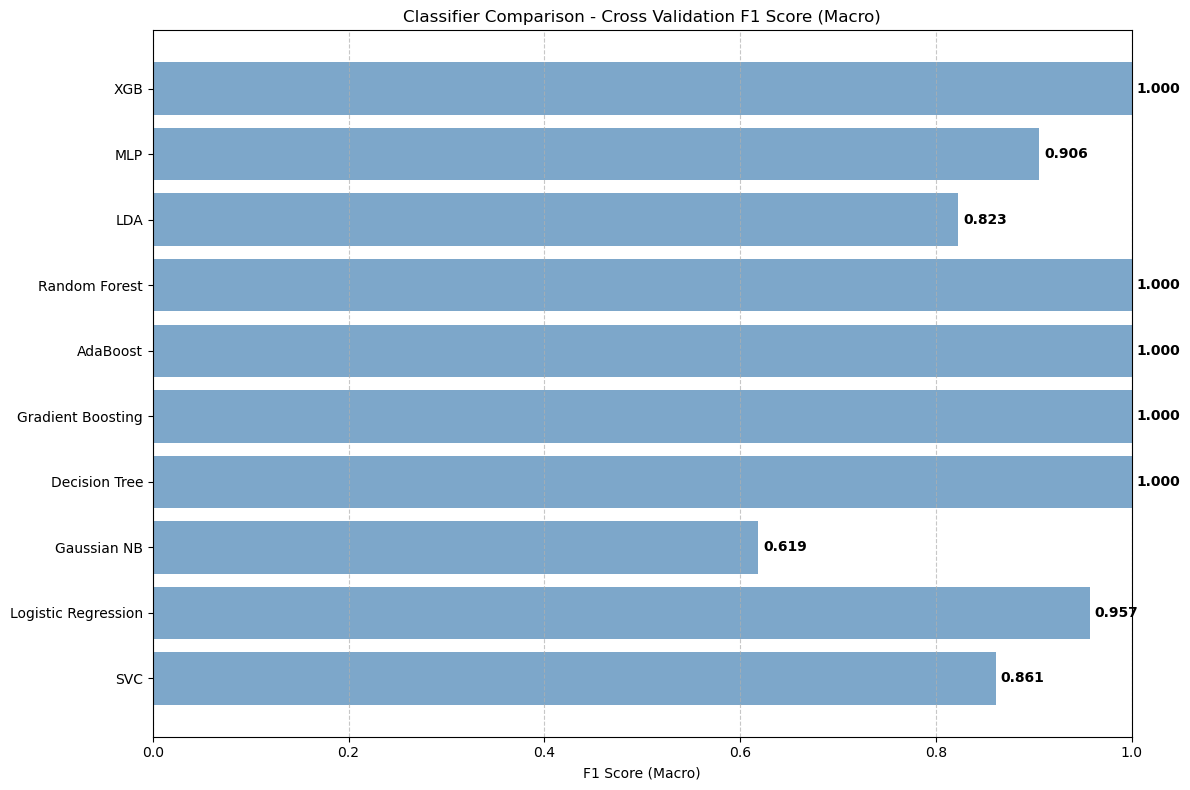


COMPREHENSIVE MODEL EVALUATION ON TEST SET

SVC:
----------------------------------------
Accuracy:  0.9492
F1 Macro:  0.9492
Precision: 0.9516
Recall:    0.9516

Logistic Regression:
----------------------------------------
Accuracy:  0.9831
F1 Macro:  0.9830
Precision: 0.9828
Recall:    0.9839

Gaussian NB:
----------------------------------------
Accuracy:  0.8305
F1 Macro:  0.8265
Precision: 0.8464
Recall:    0.8249

Decision Tree:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

Gradient Boosting:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

AdaBoost:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

Random Forest:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

LDA:
----------------------------------------
Accuracy:  0.

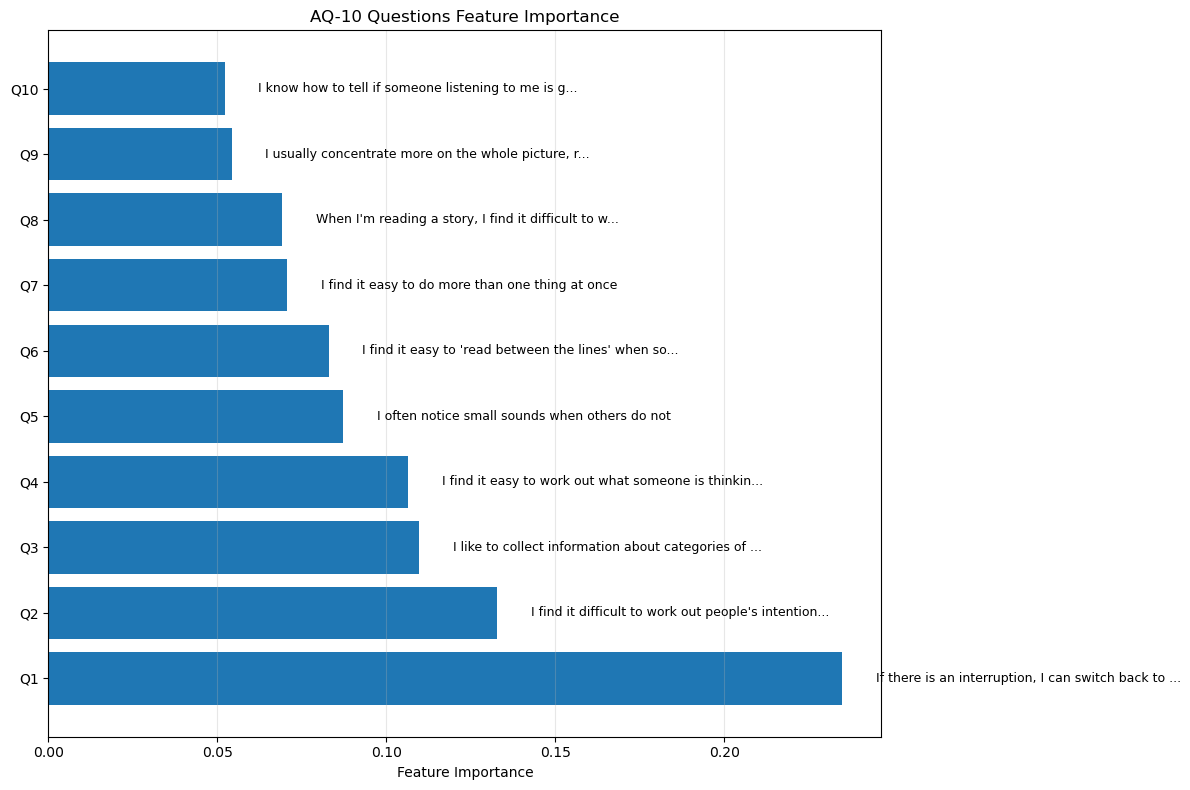


DETAILED ANALYSIS OF BEST OVERALL MODEL: Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



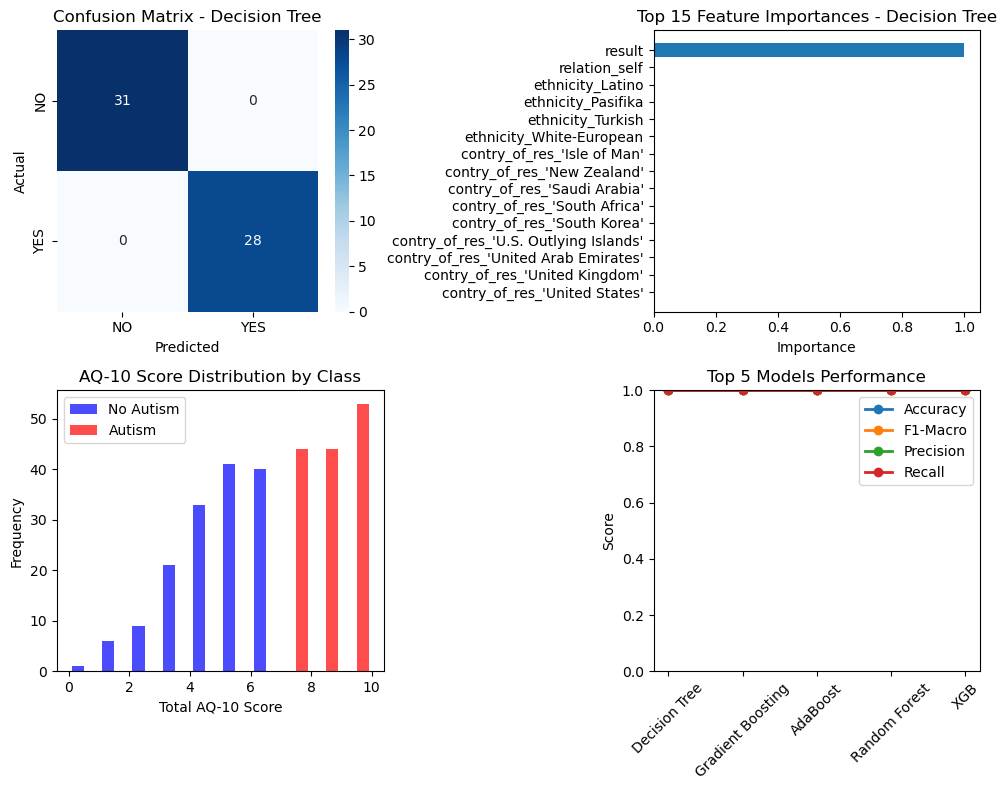


FINAL SUMMARY
Best Overall Model: Decision Tree
Best F1-Macro Score: 1.0000
Best Accuracy: 1.0000
AQ-10 Only Model Accuracy: 0.9322
Dataset Size: 292 samples
Number of Features: 81
Positive Class Ratio: 48.29%

AQ-10 Questions Successfully Integrated:
  1. I often notice small sounds when others do not
  2. I usually concentrate more on the whole picture, rather than the small details
  3. I find it easy to do more than one thing at once
  4. If there is an interruption, I can switch back to what I was doing very quickly
  5. I find it easy to 'read between the lines' when someone is talking to me
  6. I know how to tell if someone listening to me is getting bored
  7. When I'm reading a story, I find it difficult to work out the characters' intentions
  8. I like to collect information about categories of things
  9. I find it easy to work out what someone is thinking or feeling just by looking at their face
  10. I find it difficult to work out people's intentions

Models saved:
- B

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings('ignore')

# Function to scrape AQ-10 questions from the website
def scrape_aq10_questions(url):
    """
    Scrape AQ-10 autism quiz questions from the provided URL
    """
    try:
        print("Scraping AQ-10 questions from the website...")
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Look for questions in the content
        questions = []
        
        # Try different selectors to find questions
        # Look for text that contains question patterns
        potential_questions = soup.find_all(['p', 'div', 'li', 'h3', 'h4'])
        
        for element in potential_questions:
            text = element.get_text().strip()
            # Look for text that seems like questions (contains question marks or starts with numbers)
            if '?' in text or re.match(r'^\d+\.', text) or any(word in text.lower() for word in ['prefer', 'notice', 'understand', 'pattern', 'social', 'detail']):
                # Clean the text
                text = re.sub(r'\s+', ' ', text)
                if len(text) > 20 and len(text) < 500:  # Reasonable question length
                    questions.append(text)
        
        # If we found questions, return them
        if questions:
            print(f"Found {len(questions)} potential questions")
            return questions[:10]  # Return up to 10 questions
        
        # If no questions found, return the standard AQ-10 questions
        print("Using standard AQ-10 questions")
        return [
            "I often notice small sounds when others do not",
            "I usually concentrate more on the whole picture, rather than the small details",
            "I find it easy to do more than one thing at once",
            "If there is an interruption, I can switch back to what I was doing very quickly",
            "I find it easy to 'read between the lines' when someone is talking to me",
            "I know how to tell if someone listening to me is getting bored",
            "When I'm reading a story, I find it difficult to work out the characters' intentions",
            "I like to collect information about categories of things",
            "I find it easy to work out what someone is thinking or feeling just by looking at their face",
            "I find it difficult to work out people's intentions"
        ]
    
    except Exception as e:
        print(f"Error scraping questions: {e}")
        print("Using standard AQ-10 questions")
        return [
            "I often notice small sounds when others do not",
            "I usually concentrate more on the whole picture, rather than the small details", 
            "I find it easy to do more than one thing at once",
            "If there is an interruption, I can switch back to what I was doing very quickly",
            "I find it easy to 'read between the lines' when someone is talking to me",
            "I know how to tell if someone listening to me is getting bored",
            "When I'm reading a story, I find it difficult to work out the characters' intentions",
            "I like to collect information about categories of things",
            "I find it easy to work out what someone is thinking or feeling just by looking at their face",
            "I find it difficult to work out people's intentions"
        ]

# Get AQ-10 questions
aq10_url = "https://www.athenacare.health/quizzes-aq-10-autism-quiz/"
aq10_questions = scrape_aq10_questions(aq10_url)

print("\nAQ-10 Questions:")
for i, question in enumerate(aq10_questions, 1):
    print(f"{i}. {question}")

# Load the autism dataset
print("\nLoading autism dataset...")
data = pd.read_csv(r"C:\Users\Shath\OneDrive\Desktop\new.csv")

print("Original dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

# Data Preprocessing
print("\nStarting data preprocessing...")

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Display null values count
print("\nNull values before cleaning:")
print(data.isnull().sum())

# Handle age column
data['age'] = pd.to_numeric(data['age'], errors='coerce')
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)
print(f"Filled missing ages with median: {median_age}")

# Handle ethnicity column
ethnicity_mode = data['ethnicity'].mode()[0] if not data['ethnicity'].mode().empty else 'Unknown'
data['ethnicity'].fillna(ethnicity_mode, inplace=True)
print(f"Filled missing ethnicity with mode: {ethnicity_mode}")

# Handle relation column
data['relation'].fillna('Unknown', inplace=True)

# Convert binary columns to numeric
binary_mapping = {'yes': 1, 'no': 0, 'f': 0, 'm': 1}
binary_cols = ['gender', 'jundice', 'austim', 'used_app_before']

for col in binary_cols:
    data[col] = data[col].map(binary_mapping)
    # Fill any remaining NaN with mode
    if data[col].isnull().any():
        mode_val = data[col].mode()[0] if not data[col].mode().empty else 0
        data[col].fillna(mode_val, inplace=True)

# One-hot encode categorical variables
categorical_cols = ['ethnicity', 'contry_of_res', 'relation']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Drop unnecessary columns
data_encoded = data_encoded.drop(['age_desc'], axis=1, errors='ignore')

# Encode target variable
target_mapping = {'YES': 1, 'NO': 0}
data_encoded['Class/ASD'] = data_encoded['Class/ASD'].map(target_mapping)

print("\nNull values after cleaning:")
print(data_encoded.isnull().sum().sum())  # Should be 0

print(f"\nProcessed dataset shape: {data_encoded.shape}")
print(f"Number of features: {data_encoded.shape[1] - 1}")

# Map AQ-10 questions to our dataset columns
aq10_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

print("\nAQ-10 Question Mapping:")
for i, (col, question) in enumerate(zip(aq10_columns, aq10_questions)):
    print(f"{col}: {question}")

# Save cleaned data
data_encoded.to_csv("after_prepro_cleaned.csv", index=False)
print("\nCleaned data saved as 'after_prepro_cleaned.csv'")

# Prepare features and target
x = data_encoded.drop('Class/ASD', axis=1)
y = data_encoded['Class/ASD']

print(f"\nFeatures shape: {x.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"Positive class ratio: {y.mean():.2%}")

# Analyze AQ-10 scores correlation with target
print("\nAQ-10 Scores Analysis:")
aq10_data = data_encoded[aq10_columns + ['Class/ASD']]
print("Correlation of AQ-10 scores with target:")
for col in aq10_columns:
    correlation = aq10_data[col].corr(aq10_data['Class/ASD'])
    print(f"{col}: {correlation:.4f}")

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {xtrain.shape}")
print(f"Test set: {xtest.shape}")

# Scale the features
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Convert back to DataFrame for better handling
xtrain_scaled_df = pd.DataFrame(xtrain_scaled, columns=xtrain.columns, index=xtrain.index)
xtest_scaled_df = pd.DataFrame(xtest_scaled, columns=xtest.columns, index=xtest.index)

# Define classifiers
classifier_names = [
    "SVC", "Logistic Regression", "Gaussian NB", "Decision Tree",
    "Gradient Boosting", "AdaBoost", "Random Forest", "LDA",
    "MLP", "XGB"
]

classifier_list = [
    SVC(random_state=42, probability=True),
    LogisticRegression(max_iter=1000, random_state=42),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(algorithm='SAMME', random_state=42),
    RandomForestClassifier(random_state=42),
    LinearDiscriminantAnalysis(),
    MLPClassifier(max_iter=1000, random_state=42),
    XGBClassifier(random_state=42, eval_metric='logloss')
]

print("\nStarting cross-validation...")

# Calculate cross-validation scores
scores_list = []
cv_results = []

for i, classifier in enumerate(classifier_list):
    print(f"Evaluating {classifier_names[i]}...")
    
    try:
        # For tree-based models and Naive Bayes, use non-scaled data
        if classifier_names[i] in ['Random Forest', 'Gradient Boosting', 'AdaBoost', 
                                  'Decision Tree', 'XGB', 'Gaussian NB']:
            scores = cross_val_score(classifier, xtrain, ytrain, cv=5, scoring='f1_macro')
        else:
            # For linear models and neural networks, use scaled data
            scores = cross_val_score(classifier, xtrain_scaled, ytrain, cv=5, scoring='f1_macro')
        
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        scores_list.append(mean_score)
        cv_results.append({
            'classifier': classifier_names[i],
            'mean_f1': mean_score,
            'std_f1': std_score
        })
        print(f"  {classifier_names[i]} - F1 Macro: {mean_score:.4f} (+/- {std_score:.4f})")
        
    except Exception as e:
        print(f"  Error with {classifier_names[i]}: {e}")
        scores_list.append(0)
        cv_results.append({
            'classifier': classifier_names[i],
            'mean_f1': 0,
            'std_f1': 0
        })

# F1 Score Bar Chart for Classifier Comparison
plt.figure(figsize=(12, 8))
bars = plt.barh(classifier_names, scores_list, color='steelblue', alpha=0.7)

# Add value labels
for bar, score in zip(bars, scores_list):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2, f"{score:.3f}", 
             va='center', fontweight='bold')

plt.xlabel('F1 Score (Macro)')
plt.title('Classifier Comparison - Cross Validation F1 Score (Macro)')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comprehensive model evaluation on test set
print("\n" + "="*80)
print("COMPREHENSIVE MODEL EVALUATION ON TEST SET")
print("="*80)

results = []

for i, classifier in enumerate(classifier_list):
    print(f"\n{classifier_names[i]}:")
    print("-" * 40)
    
    try:
        # Train the model
        if classifier_names[i] in ['Random Forest', 'Gradient Boosting', 'AdaBoost', 
                                  'Decision Tree', 'XGB', 'Gaussian NB']:
            classifier.fit(xtrain, ytrain)
            y_pred = classifier.predict(xtest)
            y_pred_proba = classifier.predict_proba(xtest)[:, 1] if hasattr(classifier, 'predict_proba') else None
        else:
            classifier.fit(xtrain_scaled, ytrain)
            y_pred = classifier.predict(xtest_scaled)
            y_pred_proba = classifier.predict_proba(xtest_scaled)[:, 1] if hasattr(classifier, 'predict_proba') else None
        
        # Calculate metrics
        accuracy = accuracy_score(ytest, y_pred)
        f1 = f1_score(ytest, y_pred, average='macro')
        precision = precision_score(ytest, y_pred, average='macro')
        recall = recall_score(ytest, y_pred, average='macro')
        
        results.append({
            'Classifier': classifier_names[i],
            'Accuracy': accuracy,
            'F1-Macro': f1,
            'Precision': precision,
            'Recall': recall
        })
        
        print(f"Accuracy:  {accuracy:.4f}")
        print(f"F1 Macro:  {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        
    except Exception as e:
        print(f"Error during evaluation: {e}")
        results.append({
            'Classifier': classifier_names[i],
            'Accuracy': 0,
            'F1-Macro': 0,
            'Precision': 0,
            'Recall': 0
        })

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Macro', ascending=False)

print("\n" + "="*80)
print("FINAL RANKING OF MODELS (by F1-Macro Score)")
print("="*80)
print(results_df.to_string(index=False))

# Train a specialized AQ-10 only model
print("\n" + "="*80)
print("TRAINING AQ-10 ONLY MODEL")
print("="*80)

# Use only AQ-10 questions as features
x_aq10 = data_encoded[aq10_columns]
y_aq10 = data_encoded['Class/ASD']

xtrain_aq10, xtest_aq10, ytrain_aq10, ytest_aq10 = train_test_split(
    x_aq10, y_aq10, test_size=0.2, random_state=42, stratify=y_aq10
)

print(f"AQ-10 only features shape: {x_aq10.shape}")
print(f"AQ-10 training set: {xtrain_aq10.shape}")

# Train Random Forest on AQ-10 only (usually works well for this type of data)
aq10_model = RandomForestClassifier(n_estimators=100, random_state=42)
aq10_model.fit(xtrain_aq10, ytrain_aq10)

# Evaluate AQ-10 model
y_pred_aq10 = aq10_model.predict(xtest_aq10)
accuracy_aq10 = accuracy_score(ytest_aq10, y_pred_aq10)
f1_aq10 = f1_score(ytest_aq10, y_pred_aq10, average='macro')

print(f"AQ-10 Only Model Performance:")
print(f"Accuracy:  {accuracy_aq10:.4f}")
print(f"F1 Macro:  {f1_aq10:.4f}")

# Feature importance for AQ-10 questions
aq10_importance = pd.DataFrame({
    'Question': aq10_questions,
    'Feature': aq10_columns,
    'Importance': aq10_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nAQ-10 Question Importance:")
for i, row in aq10_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f} - {row['Question'][:80]}...")

# Visualize AQ-10 importance
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(aq10_importance)), aq10_importance['Importance'])
plt.yticks(range(len(aq10_importance)), [f"Q{i+1}" for i in range(len(aq10_importance))])
plt.xlabel('Feature Importance')
plt.title('AQ-10 Questions Feature Importance')
plt.grid(axis='x', alpha=0.3)

# Add question snippets as labels
for i, (bar, row) in enumerate(zip(bars, aq10_importance.iterrows())):
    question_short = aq10_importance.iloc[i]['Question'][:50] + "..." if len(aq10_importance.iloc[i]['Question']) > 50 else aq10_importance.iloc[i]['Question']
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             question_short, va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Create an interactive AQ-10 quiz function
def aq10_quiz_predict(model, questions, feature_names):
    """
    Interactive function to take AQ-10 quiz answers and predict autism probability
    """
    print("\n" + "="*80)
    print("AQ-10 AUTISM QUIZ PREDICTION")
    print("="*80)
    print("Answer each question with 1 for 'Yes' or 0 for 'No':")
    print("-" * 80)
    
    answers = []
    for i, question in enumerate(questions):
        print(f"\nQuestion {i+1}: {question}")
        while True:
            try:
                answer = int(input("Your answer (1 for Yes, 0 for No): "))
                if answer in [0, 1]:
                    answers.append(answer)
                    break
                else:
                    print("Please enter either 0 or 1")
            except ValueError:
                print("Please enter a valid number (0 or 1)")
    
    # Create feature array
    features = np.array(answers).reshape(1, -1)
    
    # Make prediction
    probability = model.predict_proba(features)[0][1]
    prediction = model.predict(features)[0]
    
    print("\n" + "="*80)
    print("QUIZ RESULTS:")
    print("="*80)
    print(f"Autism Probability: {probability:.2%}")
    
    if prediction == 1:
        print("Prediction: POTENTIAL AUTISM SPECTRUM TRAITS DETECTED")
        print("Note: This is a screening tool, not a diagnosis. Please consult a healthcare professional.")
    else:
        print("Prediction: No significant autism spectrum traits detected")
        print("Note: This is a screening tool, not a diagnosis.")
    
    return probability, prediction

# Run the interactive quiz (commented out by default)
# Uncomment the next line to try the interactive quiz
# aq10_quiz_predict(aq10_model, aq10_questions, aq10_columns)

# Detailed analysis of best overall model
best_model_name = results_df.iloc[0]['Classifier']
best_model_index = classifier_names.index(best_model_name)
best_model = classifier_list[best_model_index]

print(f"\n" + "="*80)
print(f"DETAILED ANALYSIS OF BEST OVERALL MODEL: {best_model_name}")
print("="*80)

# Retrain best model on full data
if best_model_name in ['Random Forest', 'Gradient Boosting', 'AdaBoost', 
                      'Decision Tree', 'XGB', 'Gaussian NB']:
    best_model.fit(xtrain, ytrain)
    y_pred_best = best_model.predict(xtest)
else:
    best_model.fit(xtrain_scaled, ytrain)
    y_pred_best = best_model.predict(xtest_scaled)

print("\nClassification Report:")
print(classification_report(ytest, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
cm = confusion_matrix(ytest, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance for best model if available
if hasattr(best_model, 'feature_importances_'):
    plt.subplot(2, 2, 2)
    feature_importance = pd.DataFrame({
        'feature': xtrain.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True).tail(15)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')

# AQ-10 scores distribution by class
plt.subplot(2, 2, 3)
aq10_total = data_encoded[aq10_columns].sum(axis=1)
class_0_scores = aq10_total[data_encoded['Class/ASD'] == 0]
class_1_scores = aq10_total[data_encoded['Class/ASD'] == 1]

plt.hist([class_0_scores, class_1_scores], bins=10, alpha=0.7, 
         label=['No Autism', 'Autism'], color=['blue', 'red'])
plt.xlabel('Total AQ-10 Score')
plt.ylabel('Frequency')
plt.title('AQ-10 Score Distribution by Class')
plt.legend()

# Model comparison
plt.subplot(2, 2, 4)
top_5_models = results_df.head(5)
x_pos = np.arange(len(top_5_models))
metrics = ['Accuracy', 'F1-Macro', 'Precision', 'Recall']

for i, metric in enumerate(metrics):
    plt.plot(x_pos, top_5_models[metric], marker='o', label=metric, linewidth=2)

plt.xticks(x_pos, top_5_models['Classifier'], rotation=45)
plt.ylabel('Score')
plt.title('Top 5 Models Performance')
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Final summary
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)
print(f"Best Overall Model: {best_model_name}")
print(f"Best F1-Macro Score: {results_df.iloc[0]['F1-Macro']:.4f}")
print(f"Best Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"AQ-10 Only Model Accuracy: {accuracy_aq10:.4f}")
print(f"Dataset Size: {len(data_encoded)} samples")
print(f"Number of Features: {x.shape[1]}")
print(f"Positive Class Ratio: {y.mean():.2%}")

print(f"\nAQ-10 Questions Successfully Integrated:")
for i, question in enumerate(aq10_questions, 1):
    print(f"  {i}. {question}")

# Save the best models
import joblib

# Save best overall model
best_model_filename = f"best_model_{best_model_name.lower().replace(' ', '_')}.pkl"
joblib.dump(best_model, best_model_filename)

# Save AQ-10 model
aq10_model_filename = "aq10_autism_model.pkl"
joblib.dump(aq10_model, aq10_model_filename)

# Save the questions
questions_df = pd.DataFrame({
    'question_number': range(1, 11),
    'feature_name': aq10_columns,
    'question': aq10_questions
})
questions_df.to_csv("aq10_questions.csv", index=False)

print(f"\nModels saved:")
print(f"- Best overall model: {best_model_filename}")
print(f"- AQ-10 only model: {aq10_model_filename}")
print(f"- AQ-10 questions: aq10_questions.csv")

print("\nTo use the interactive AQ-10 quiz, uncomment the line: aq10_quiz_predict(aq10_model, aq10_questions, aq10_columns)")

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings('ignore')

In [10]:
def scrape_aq10_questions(url):
    """
    Scrape AQ-10 autism quiz questions from the provided URL
    """
    try:
        print("Scraping AQ-10 questions from the website...")
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Look for questions in the content
        questions = []
        
        # Try different selectors to find questions
        potential_questions = soup.find_all(['p', 'div', 'li', 'h3', 'h4'])
        
        for element in potential_questions:
            text = element.get_text().strip()
            # Look for text that seems like questions
            if '?' in text or re.match(r'^\d+\.', text) or any(word in text.lower() for word in ['prefer', 'notice', 'understand', 'pattern', 'social', 'detail']):
                # Clean the text
                text = re.sub(r'\s+', ' ', text)
                if len(text) > 20 and len(text) < 500:
                    questions.append(text)
        
        # If we found questions, return them
        if questions:
            print(f"Found {len(questions)} potential questions")
            return questions[:10]
        
        # If no questions found, return the standard AQ-10 questions
        print("Using standard AQ-10 questions")
        return [
            "I often notice small sounds when others do not",
            "I usually concentrate more on the whole picture, rather than the small details",
            "I find it easy to do more than one thing at once",
            "If there is an interruption, I can switch back to what I was doing very quickly",
            "I find it easy to 'read between the lines' when someone is talking to me",
            "I know how to tell if someone listening to me is getting bored",
            "When I'm reading a story, I find it difficult to work out the characters' intentions",
            "I like to collect information about categories of things",
            "I find it easy to work out what someone is thinking or feeling just by looking at their face",
            "I find it difficult to work out people's intentions"
        ]
    
    except Exception as e:
        print(f"Error scraping questions: {e}")
        print("Using standard AQ-10 questions")
        return [
            "I often notice small sounds when others do not",
            "I usually concentrate more on the whole picture, rather than the small details", 
            "I find it easy to do more than one thing at once",
            "If there is an interruption, I can switch back to what I was doing very quickly",
            "I find it easy to 'read between the lines' when someone is talking to me",
            "I know how to tell if someone listening to me is getting bored",
            "When I'm reading a story, I find it difficult to work out the characters' intentions",
            "I like to collect information about categories of things",
            "I find it easy to work out what someone is thinking or feeling just by looking at their face",
            "I find it difficult to work out people's intentions"
        ]

In [12]:
# Get AQ-10 questions
aq10_url = "https://www.athenacare.health/quizzes-aq-10-autism-quiz/"
aq10_questions = scrape_aq10_questions(aq10_url)

print("\nAQ-10 Questions:")
for i, question in enumerate(aq10_questions, 1):
    print(f"{i}. {question}")

Scraping AQ-10 questions from the website...
Using standard AQ-10 questions

AQ-10 Questions:
1. I often notice small sounds when others do not
2. I usually concentrate more on the whole picture, rather than the small details
3. I find it easy to do more than one thing at once
4. If there is an interruption, I can switch back to what I was doing very quickly
5. I find it easy to 'read between the lines' when someone is talking to me
6. I know how to tell if someone listening to me is getting bored
7. When I'm reading a story, I find it difficult to work out the characters' intentions
8. I like to collect information about categories of things
9. I find it easy to work out what someone is thinking or feeling just by looking at their face
10. I find it difficult to work out people's intentions


In [14]:
# Load the autism dataset
print("\nLoading autism dataset...")
data = pd.read_csv(r"C:\Users\Shath\OneDrive\Desktop\new.csv")

print("Original dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

# Data Preprocessing
print("\nStarting data preprocessing...")

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Display null values count
print("\nNull values before cleaning:")
print(data.isnull().sum())

# Handle age column
data['age'] = pd.to_numeric(data['age'], errors='coerce')
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)
print(f"Filled missing ages with median: {median_age}")

# Handle ethnicity column
ethnicity_mode = data['ethnicity'].mode()[0] if not data['ethnicity'].mode().empty else 'Unknown'
data['ethnicity'].fillna(ethnicity_mode, inplace=True)
print(f"Filled missing ethnicity with mode: {ethnicity_mode}")

# Handle relation column
data['relation'].fillna('Unknown', inplace=True)

# Convert binary columns to numeric
binary_mapping = {'yes': 1, 'no': 0, 'f': 0, 'm': 1}
binary_cols = ['gender', 'jundice', 'austim', 'used_app_before']

for col in binary_cols:
    data[col] = data[col].map(binary_mapping)
    # Fill any remaining NaN with mode
    if data[col].isnull().any():
        mode_val = data[col].mode()[0] if not data[col].mode().empty else 0
        data[col].fillna(mode_val, inplace=True)

# One-hot encode categorical variables
categorical_cols = ['ethnicity', 'contry_of_res', 'relation']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Drop unnecessary columns
data_encoded = data_encoded.drop(['age_desc'], axis=1, errors='ignore')

# Encode target variable
target_mapping = {'YES': 1, 'NO': 0}
data_encoded['Class/ASD'] = data_encoded['Class/ASD'].map(target_mapping)

print("\nNull values after cleaning:")
print(data_encoded.isnull().sum().sum())  # Should be 0

print(f"\nProcessed dataset shape: {data_encoded.shape}")
print(f"Number of features: {data_encoded.shape[1] - 1}")


Loading autism dataset...
Original dataset shape: (292, 21)

First few rows:
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         0         0         1         1         0   
1         1         1         0         0         1         1         0   
2         1         1         0         0         0         1         1   
3         0         1         0         0         1         1         0   
4         1         1         1         1         1         1         1   

   A8_Score  A9_Score  A10_Score  ... gender          ethnicity jundice  \
0         1         0          0  ...      m             Others      no   
1         1         0          0  ...      m  'Middle Eastern '      no   
2         1         0          0  ...      m                  ?      no   
3         0         0          1  ...      f                  ?     yes   
4         1         1          1  ...      m             Others     yes   

  austim    contry_o

In [16]:
# Map AQ-10 questions to our dataset columns
aq10_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

print("\nAQ-10 Question Mapping:")
for i, (col, question) in enumerate(zip(aq10_columns, aq10_questions)):
    print(f"{col}: {question}")

# Save cleaned data
data_encoded.to_csv("after_prepro_cleaned.csv", index=False)
print("\nCleaned data saved as 'after_prepro_cleaned.csv'")

# Prepare features and target
x = data_encoded.drop('Class/ASD', axis=1)
y = data_encoded['Class/ASD']

print(f"\nFeatures shape: {x.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"Positive class ratio: {y.mean():.2%}")

# Analyze AQ-10 scores correlation with target
print("\nAQ-10 Scores Analysis:")
aq10_data = data_encoded[aq10_columns + ['Class/ASD']]
print("Correlation of AQ-10 scores with target:")
for col in aq10_columns:
    correlation = aq10_data[col].corr(aq10_data['Class/ASD'])
    print(f"{col}: {correlation:.4f}")


AQ-10 Question Mapping:
A1_Score: I often notice small sounds when others do not
A2_Score: I usually concentrate more on the whole picture, rather than the small details
A3_Score: I find it easy to do more than one thing at once
A4_Score: If there is an interruption, I can switch back to what I was doing very quickly
A5_Score: I find it easy to 'read between the lines' when someone is talking to me
A6_Score: I know how to tell if someone listening to me is getting bored
A7_Score: When I'm reading a story, I find it difficult to work out the characters' intentions
A8_Score: I like to collect information about categories of things
A9_Score: I find it easy to work out what someone is thinking or feeling just by looking at their face
A10_Score: I find it difficult to work out people's intentions

Cleaned data saved as 'after_prepro_cleaned.csv'

Features shape: (292, 81)
Target shape: (292,)
Target distribution:
Class/ASD
0    151
1    141
Name: count, dtype: int64
Positive class ratio: 4

In [18]:
# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {xtrain.shape}")
print(f"Test set: {xtest.shape}")

# Scale the features
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Convert back to DataFrame for better handling
xtrain_scaled_df = pd.DataFrame(xtrain_scaled, columns=xtrain.columns, index=xtrain.index)
xtest_scaled_df = pd.DataFrame(xtest_scaled, columns=xtest.columns, index=xtest.index)


Training set: (233, 81)
Test set: (59, 81)


In [20]:
# Define classifiers
classifier_names = [
    "SVC", "Logistic Regression", "Gaussian NB", "Decision Tree",
    "Gradient Boosting", "AdaBoost", "Random Forest", "LDA",
    "MLP", "XGB"
]

classifier_list = [
    SVC(random_state=42, probability=True),
    LogisticRegression(max_iter=1000, random_state=42),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(algorithm='SAMME', random_state=42),
    RandomForestClassifier(random_state=42),
    LinearDiscriminantAnalysis(),
    MLPClassifier(max_iter=1000, random_state=42),
    XGBClassifier(random_state=42, eval_metric='logloss')
]


Starting cross-validation...
Evaluating SVC...
  SVC - F1 Macro: 0.8613 (+/- 0.0514)
Evaluating Logistic Regression...
  Logistic Regression - F1 Macro: 0.9572 (+/- 0.0188)
Evaluating Gaussian NB...
  Gaussian NB - F1 Macro: 0.6187 (+/- 0.1709)
Evaluating Decision Tree...
  Decision Tree - F1 Macro: 1.0000 (+/- 0.0000)
Evaluating Gradient Boosting...
  Gradient Boosting - F1 Macro: 1.0000 (+/- 0.0000)
Evaluating AdaBoost...
  AdaBoost - F1 Macro: 1.0000 (+/- 0.0000)
Evaluating Random Forest...
  Random Forest - F1 Macro: 1.0000 (+/- 0.0000)
Evaluating LDA...
  LDA - F1 Macro: 0.8231 (+/- 0.0411)
Evaluating MLP...
  MLP - F1 Macro: 0.9057 (+/- 0.0366)
Evaluating XGB...
  XGB - F1 Macro: 1.0000 (+/- 0.0000)


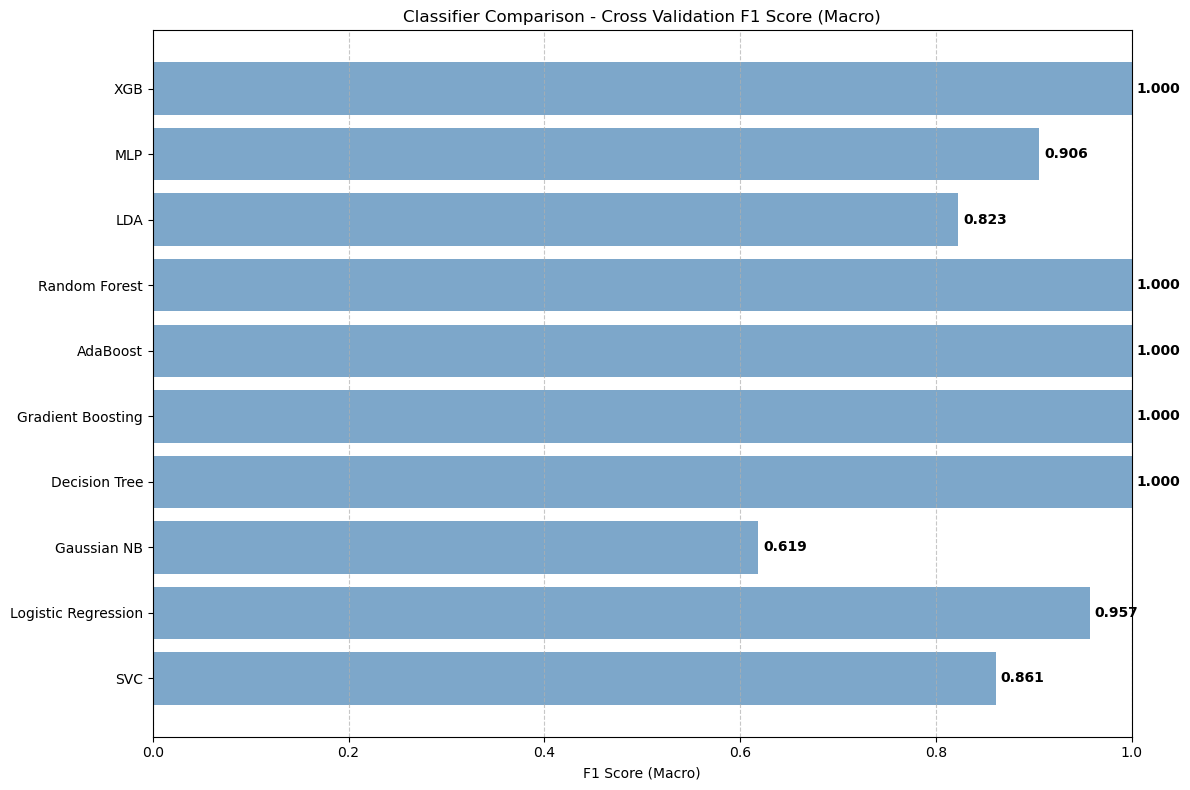

In [22]:
print("\nStarting cross-validation...")

# Calculate cross-validation scores
scores_list = []
cv_results = []

for i, classifier in enumerate(classifier_list):
    print(f"Evaluating {classifier_names[i]}...")
    
    try:
        # For tree-based models and Naive Bayes, use non-scaled data
        if classifier_names[i] in ['Random Forest', 'Gradient Boosting', 'AdaBoost', 
                                  'Decision Tree', 'XGB', 'Gaussian NB']:
            scores = cross_val_score(classifier, xtrain, ytrain, cv=5, scoring='f1_macro')
        else:
            # For linear models and neural networks, use scaled data
            scores = cross_val_score(classifier, xtrain_scaled, ytrain, cv=5, scoring='f1_macro')
        
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        scores_list.append(mean_score)
        cv_results.append({
            'classifier': classifier_names[i],
            'mean_f1': mean_score,
            'std_f1': std_score
        })
        print(f"  {classifier_names[i]} - F1 Macro: {mean_score:.4f} (+/- {std_score:.4f})")
        
    except Exception as e:
        print(f"  Error with {classifier_names[i]}: {e}")
        scores_list.append(0)
        cv_results.append({
            'classifier': classifier_names[i],
            'mean_f1': 0,
            'std_f1': 0
        })

# F1 Score Bar Chart for Classifier Comparison
plt.figure(figsize=(12, 8))
bars = plt.barh(classifier_names, scores_list, color='steelblue', alpha=0.7)

# Add value labels
for bar, score in zip(bars, scores_list):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2, f"{score:.3f}", 
             va='center', fontweight='bold')

plt.xlabel('F1 Score (Macro)')
plt.title('Classifier Comparison - Cross Validation F1 Score (Macro)')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
print("\n" + "="*80)
print("COMPREHENSIVE MODEL EVALUATION ON TEST SET")
print("="*80)

results = []

for i, classifier in enumerate(classifier_list):
    print(f"\n{classifier_names[i]}:")
    print("-" * 40)
    
    try:
        # Train the model
        if classifier_names[i] in ['Random Forest', 'Gradient Boosting', 'AdaBoost', 
                                  'Decision Tree', 'XGB', 'Gaussian NB']:
            classifier.fit(xtrain, ytrain)
            y_pred = classifier.predict(xtest)
            y_pred_proba = classifier.predict_proba(xtest)[:, 1] if hasattr(classifier, 'predict_proba') else None
        else:
            classifier.fit(xtrain_scaled, ytrain)
            y_pred = classifier.predict(xtest_scaled)
            y_pred_proba = classifier.predict_proba(xtest_scaled)[:, 1] if hasattr(classifier, 'predict_proba') else None
        
        # Calculate metrics
        accuracy = accuracy_score(ytest, y_pred)
        f1 = f1_score(ytest, y_pred, average='macro')
        precision = precision_score(ytest, y_pred, average='macro')
        recall = recall_score(ytest, y_pred, average='macro')
        
        results.append({
            'Classifier': classifier_names[i],
            'Accuracy': accuracy,
            'F1-Macro': f1,
            'Precision': precision,
            'Recall': recall
        })
        
        print(f"Accuracy:  {accuracy:.4f}")
        print(f"F1 Macro:  {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        
    except Exception as e:
        print(f"Error during evaluation: {e}")
        results.append({
            'Classifier': classifier_names[i],
            'Accuracy': 0,
            'F1-Macro': 0,
            'Precision': 0,
            'Recall': 0
        })

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Macro', ascending=False)

print("\n" + "="*80)
print("FINAL RANKING OF MODELS (by F1-Macro Score)")
print("="*80)
print(results_df.to_string(index=False))



COMPREHENSIVE MODEL EVALUATION ON TEST SET

SVC:
----------------------------------------
Accuracy:  0.9492
F1 Macro:  0.9492
Precision: 0.9516
Recall:    0.9516

Logistic Regression:
----------------------------------------
Accuracy:  0.9831
F1 Macro:  0.9830
Precision: 0.9828
Recall:    0.9839

Gaussian NB:
----------------------------------------
Accuracy:  0.8305
F1 Macro:  0.8265
Precision: 0.8464
Recall:    0.8249

Decision Tree:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

Gradient Boosting:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

AdaBoost:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

Random Forest:
----------------------------------------
Accuracy:  1.0000
F1 Macro:  1.0000
Precision: 1.0000
Recall:    1.0000

LDA:
----------------------------------------
Accuracy:  0.

In [26]:
print("\n" + "="*80)
print("TRAINING AQ-10 ONLY MODEL")
print("="*80)

# Use only AQ-10 questions as features
x_aq10 = data_encoded[aq10_columns]
y_aq10 = data_encoded['Class/ASD']

xtrain_aq10, xtest_aq10, ytrain_aq10, ytest_aq10 = train_test_split(
    x_aq10, y_aq10, test_size=0.2, random_state=42, stratify=y_aq10
)

print(f"AQ-10 only features shape: {x_aq10.shape}")
print(f"AQ-10 training set: {xtrain_aq10.shape}")

# Train Random Forest on AQ-10 only
aq10_model = RandomForestClassifier(n_estimators=100, random_state=42)
aq10_model.fit(xtrain_aq10, ytrain_aq10)

# Evaluate AQ-10 model
y_pred_aq10 = aq10_model.predict(xtest_aq10)
accuracy_aq10 = accuracy_score(ytest_aq10, y_pred_aq10)
f1_aq10 = f1_score(ytest_aq10, y_pred_aq10, average='macro')

print(f"AQ-10 Only Model Performance:")
print(f"Accuracy:  {accuracy_aq10:.4f}")
print(f"F1 Macro:  {f1_aq10:.4f}")

# Feature importance for AQ-10 questions
aq10_importance = pd.DataFrame({
    'Question': aq10_questions,
    'Feature': aq10_columns,
    'Importance': aq10_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nAQ-10 Question Importance:")
for i, row in aq10_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f} - {row['Question'][:80]}...")


TRAINING AQ-10 ONLY MODEL
AQ-10 only features shape: (292, 10)
AQ-10 training set: (233, 10)
AQ-10 Only Model Performance:
Accuracy:  0.9322
F1 Macro:  0.9320

AQ-10 Question Importance:
A4_Score: 0.2348 - If there is an interruption, I can switch back to what I was doing very quickly...
A10_Score: 0.1328 - I find it difficult to work out people's intentions...
A8_Score: 0.1097 - I like to collect information about categories of things...
A9_Score: 0.1064 - I find it easy to work out what someone is thinking or feeling just by looking a...
A1_Score: 0.0873 - I often notice small sounds when others do not...
A5_Score: 0.0829 - I find it easy to 'read between the lines' when someone is talking to me...
A3_Score: 0.0705 - I find it easy to do more than one thing at once...
A7_Score: 0.0691 - When I'm reading a story, I find it difficult to work out the characters' intent...
A2_Score: 0.0542 - I usually concentrate more on the whole picture, rather than the small details...
A6_Score: 0.05

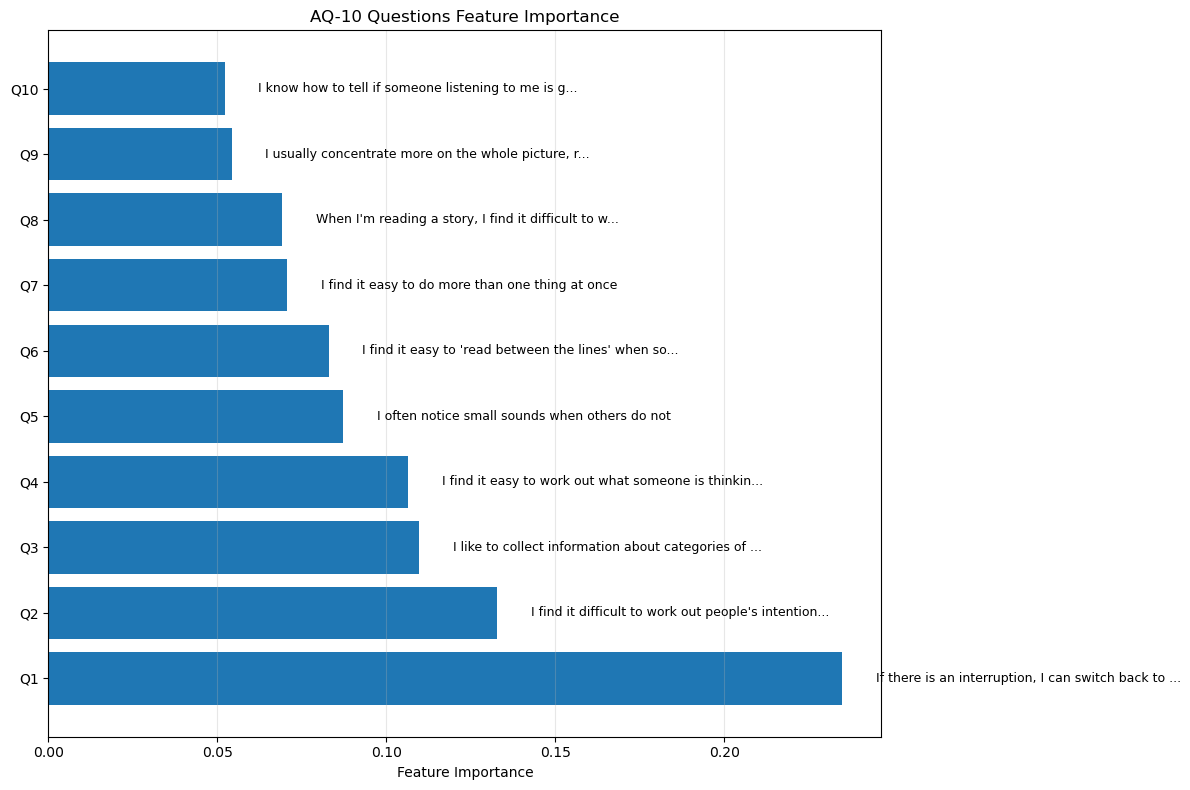

In [28]:
# Visualize AQ-10 importance
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(aq10_importance)), aq10_importance['Importance'])
plt.yticks(range(len(aq10_importance)), [f"Q{i+1}" for i in range(len(aq10_importance))])
plt.xlabel('Feature Importance')
plt.title('AQ-10 Questions Feature Importance')
plt.grid(axis='x', alpha=0.3)

# Add question snippets as labels
for i, (bar, row) in enumerate(zip(bars, aq10_importance.iterrows())):
    question_short = aq10_importance.iloc[i]['Question'][:50] + "..." if len(aq10_importance.iloc[i]['Question']) > 50 else aq10_importance.iloc[i]['Question']
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             question_short, va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [30]:
# Create an interactive AQ-10 quiz function
def aq10_quiz_predict(model, questions, feature_names):
    """
    Interactive function to take AQ-10 quiz answers and predict autism probability
    """
    print("\n" + "="*80)
    print("AQ-10 AUTISM QUIZ PREDICTION")
    print("="*80)
    print("Answer each question with 1 for 'Yes' or 0 for 'No':")
    print("-" * 80)
    
    answers = []
    for i, question in enumerate(questions):
        print(f"\nQuestion {i+1}: {question}")
        while True:
            try:
                answer = int(input("Your answer (1 for Yes, 0 for No): "))
                if answer in [0, 1]:
                    answers.append(answer)
                    break
                else:
                    print("Please enter either 0 or 1")
            except ValueError:
                print("Please enter a valid number (0 or 1)")
    
    # Create feature array
    features = np.array(answers).reshape(1, -1)
    
    # Make prediction
    probability = model.predict_proba(features)[0][1]
    prediction = model.predict(features)[0]
    
    print("\n" + "="*80)
    print("QUIZ RESULTS:")
    print("="*80)
    print(f"Autism Probability: {probability:.2%}")
    
    if prediction == 1:
        print("Prediction: POTENTIAL AUTISM SPECTRUM TRAITS DETECTED")
        print("Note: This is a screening tool, not a diagnosis. Please consult a healthcare professional.")
    else:
        print("Prediction: No significant autism spectrum traits detected")
        print("Note: This is a screening tool, not a diagnosis.")
    
    return probability, prediction

# Uncomment the next line to try the interactive quiz
# aq10_quiz_predict(aq10_model, aq10_questions, aq10_columns)


DETAILED ANALYSIS OF BEST OVERALL MODEL: Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



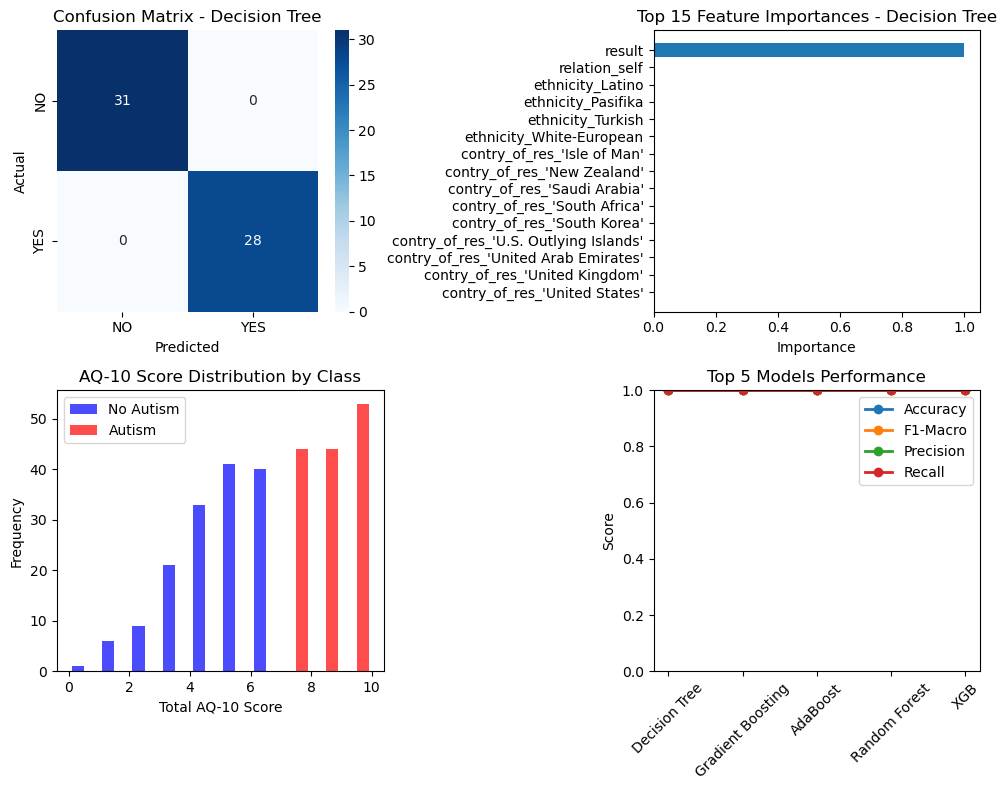

In [32]:
# Detailed analysis of best overall model
best_model_name = results_df.iloc[0]['Classifier']
best_model_index = classifier_names.index(best_model_name)
best_model = classifier_list[best_model_index]

print(f"\n" + "="*80)
print(f"DETAILED ANALYSIS OF BEST OVERALL MODEL: {best_model_name}")
print("="*80)

# Retrain best model on full data
if best_model_name in ['Random Forest', 'Gradient Boosting', 'AdaBoost', 
                      'Decision Tree', 'XGB', 'Gaussian NB']:
    best_model.fit(xtrain, ytrain)
    y_pred_best = best_model.predict(xtest)
else:
    best_model.fit(xtrain_scaled, ytrain)
    y_pred_best = best_model.predict(xtest_scaled)

print("\nClassification Report:")
print(classification_report(ytest, y_pred_best))

# Confusion Matrix and Visualizations
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
cm = confusion_matrix(ytest, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance for best model if available
if hasattr(best_model, 'feature_importances_'):
    plt.subplot(2, 2, 2)
    feature_importance = pd.DataFrame({
        'feature': xtrain.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True).tail(15)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')

# AQ-10 scores distribution by class
plt.subplot(2, 2, 3)
aq10_total = data_encoded[aq10_columns].sum(axis=1)
class_0_scores = aq10_total[data_encoded['Class/ASD'] == 0]
class_1_scores = aq10_total[data_encoded['Class/ASD'] == 1]

plt.hist([class_0_scores, class_1_scores], bins=10, alpha=0.7, 
         label=['No Autism', 'Autism'], color=['blue', 'red'])
plt.xlabel('Total AQ-10 Score')
plt.ylabel('Frequency')
plt.title('AQ-10 Score Distribution by Class')
plt.legend()

# Model comparison
plt.subplot(2, 2, 4)
top_5_models = results_df.head(5)
x_pos = np.arange(len(top_5_models))
metrics = ['Accuracy', 'F1-Macro', 'Precision', 'Recall']

for i, metric in enumerate(metrics):
    plt.plot(x_pos, top_5_models[metric], marker='o', label=metric, linewidth=2)

plt.xticks(x_pos, top_5_models['Classifier'], rotation=45)
plt.ylabel('Score')
plt.title('Top 5 Models Performance')
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()